# 三个模态数据在一起的预测实验
实验（1）输入是统计特征，算法：机器学习算法

实验（2）输入是三维，深度学习算法

In [1]:
#导入库
# This makes it so that matplotlib graphics will show up within the Jupyter Notebook.
%matplotlib inline

# Standard library import
import os

# Data Analysis Tools
import pandas as pd
import numpy as np

# Visualization Tools
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Tools
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Deep Learning Tools
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPool2D, Conv1D, MaxPool1D
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional
from tensorflow.keras.optimizers import Adam, Adadelta, Adagrad, Adamax, RMSprop

# File Loading Tools
import pickle

## 实验（1）
统计特征做预测

In [3]:
data_train = pd.read_csv('./data phm 2016/features_three_mode_train.csv')
data_test = pd.read_csv('./data phm 2016/features_three_mode_test.csv')
print(data_train.shape, data_test.shape)

(1977, 99) (424, 99)


In [4]:
data_train

,WAFER_ID,STAGE,DRESSING_WATER_STATUS_mean,DRESSING_WATER_STATUS_std,DRESSING_WATER_STATUS_median,DRESSING_WATER_STATUS_sub,DRESSING_WATER_STATUS_auc,USAGE_OF_DRESSER_TABLE_mean,USAGE_OF_DRESSER_TABLE_std,USAGE_OF_DRESSER_TABLE_median,...,USAGE_OF_POLISHING_TABLE_median,USAGE_OF_POLISHING_TABLE_sub,USAGE_OF_POLISHING_TABLE_auc,RETAINER_RING_PRESSURE_mean,RETAINER_RING_PRESSURE_std,RETAINER_RING_PRESSURE_median,RETAINER_RING_PRESSURE_sub,RETAINER_RING_PRESSURE_auc,AVG_REMOVAL_RATE,Mode
0,-4.230161e+09,A,0.580925,0.494122,1,1,216.8340,2734.000000,0.000000,2734.00,...,207.407407,11.111111,74939.451851,1606.416763,1533.048952,1446.90,7702.5,557075.873243,68.88180,I
1,-4.230160e+09,A,0.637427,0.481447,1,1,232.5000,2925.961988,0.232958,2925.75,...,277.037037,5.925926,98693.640368,939.033333,1568.458014,0.00,8782.8,321572.620157,75.34995,I
2,-4.230160e+09,A,0.546512,0.498557,1,1,195.5000,2888.000000,0.000000,2888.00,...,43.703704,5.925926,15237.777037,830.348547,1397.011439,0.00,9055.8,280847.172504,78.33015,I
3,-4.230160e+09,A,0.156342,0.363716,0,1,67.6675,2890.750000,0.000000,2890.75,...,117.777778,11.111111,42995.719259,1512.624779,1329.171535,1446.90,7070.7,563023.831487,79.80450,I
4,-4.228161e+09,A,0.572674,0.495411,1,1,213.3335,2728.619186,0.125047,2728.50,...,57.777778,5.185185,20273.210000,803.615407,1311.101519,0.00,7074.6,275579.352740,67.42425,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,2.076207e+09,A,0.560440,0.497245,1,1,161.0000,4226.250000,0.000000,4226.25,...,218.518519,0.000000,63370.370371,0.000000,0.000000,0.00,0.0,0.000000,150.46965,III
1973,2.076207e+09,A,0.550388,0.498421,1,1,159.3330,4227.250000,0.000000,4227.25,...,237.037037,0.000000,65659.259259,0.000000,0.000000,0.00,0.0,0.000000,148.90980,III
1974,2.076208e+09,A,0.534296,0.499725,1,1,154.5000,4193.500000,0.000000,4193.50,...,157.777778,0.000000,46386.666667,0.000000,0.000000,0.00,0.0,0.000000,158.02485,III
1975,2.076208e+09,A,0.544444,0.498946,1,1,164.8335,4193.037963,0.089886,4193.00,...,144.444444,0.740741,41464.814815,226.633333,766.257155,0.00,6181.5,60026.850000,151.91250,III


In [3]:
cols_all = list(data_train.columns)
cols_unit = ['WAFER_ID', 'STAGE', 'Mode']
col_y = ['AVG_REMOVAL_RATE']
cols_feature = list(set(cols_all) - set(cols_unit) - set(col_y)) 
print('number of features: ', len(cols_feature))

number of features:  95


In [142]:
# 使用全部的特征
# 切分训练集
train_x = data_train.loc[:, cols_feature]
train_y = data_train.loc[:, col_y]

# 切分测试集
test_x = data_test.loc[:, cols_feature]
test_y = data_test.loc[:, col_y]

print('训练集大小', train_x.shape, train_y.shape)
print('测试集大小', test_x.shape, test_y.shape)

训练集大小 (1977, 95) (1977, 1)
测试集大小 (424, 95) (424, 1)


In [122]:
# # 全连接网络: 运行了好几万次都是mse=600+
# neurons_per_layer = 40
# input_dim = train_x.shape[1]
# layer_num = 20


# model = Sequential(name='model_full_connection')
# model.add(Input(shape=(input_dim,)))
# for i in range(0, layer_num):
#     model.add(Dense(neurons_per_layer, activation='relu', name=f'dense{i}'))
# # model.add(Dense(4, activation='relu', name='dense'))
# model.add(Dense(1, activation='linear', name='output'))
# print(model.summary())

# opt = Adadelta(learning_rate=0.0002)
# model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])

# model.fit(train_x, train_y, epochs=4000, batch_size=200)

# y_pred = model.predict(test_x)

# mse = mean_squared_error(test_y, y_pred)
# rmse = np.sqrt(mean_squared_error(test_y, y_pred))
# mae = mean_absolute_error(test_y, y_pred)
# r2 = r2_score(test_y, y_pred)

# print(f'mse: {mse}')
# print(f'mae: {mae}')
# print(f'rmse: {rmse}')
# print(f'r2 score: {r2}')
          
# plt.figure(figsize=(12,6))
# plt.plot(test_y, label='Truth')
# plt.plot(y_pred, label='Predicted')
# plt.title('Test Set Prediction Curve')
# plt.legend()
# plt.show()

In [139]:
# # 选择('EDGE_AIR_BAG_PRESSURE', 'USAGE_OF_POLISHING_TABLE')开头的特征
# cols_not_sel = [col for col in list(data_train.columns) if col.startswith('USAGE_OF_MEMBRANE') or col.startswith('USAGE_OF_POLISHING_TABLE')]
# cols_sel = list(set(cols_feature) - set(cols_not_sel))
# # 切分训练集
# train_x = data_train.loc[:, cols_sel]
# train_y = data_train.loc[:, col_y]

# # 切分测试集
# test_x = data_test.loc[:, cols_sel]
# test_y = data_test.loc[:, col_y]

# print('训练集大小', train_x.shape, train_y.shape)
# print('测试集大小', test_x.shape, test_y.shape)

训练集大小 (1977, 85) (1977, 1)
测试集大小 (424, 85) (424, 1)


Xgboost
mse: 59.4073374790031
mae: 3.5718806473642024
error std: 30.618189981879937


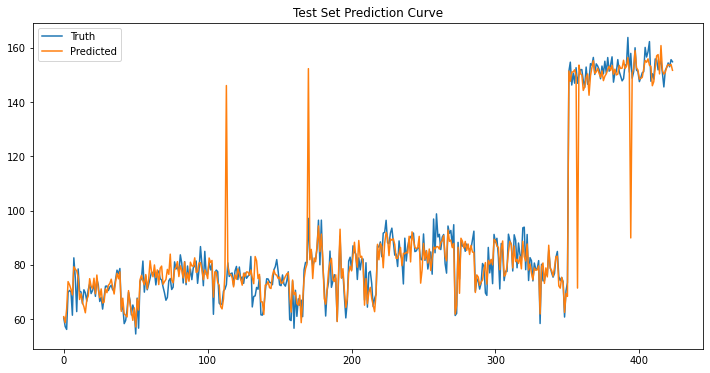

LightGBM
mse: 43.26714480078463
mae: 3.388692697207676
error std: 30.56222626051082


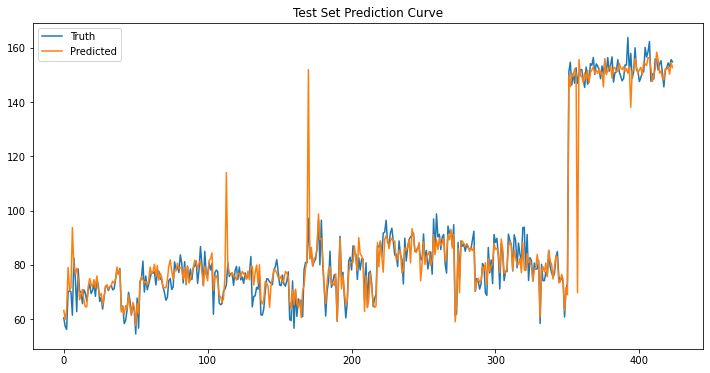

/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GBDT
mse: 51.900274827212854
mae: 3.8188866772949015
error std: 30.583166864191963


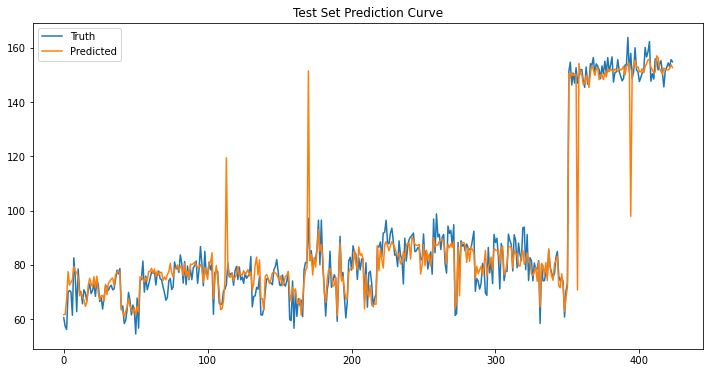

<ipython-input-156-490be4237eaf>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x, train_y)


RandomForest
mse: 45.18945587175659
mae: 3.3725611945754714
error std: 30.535599878774345


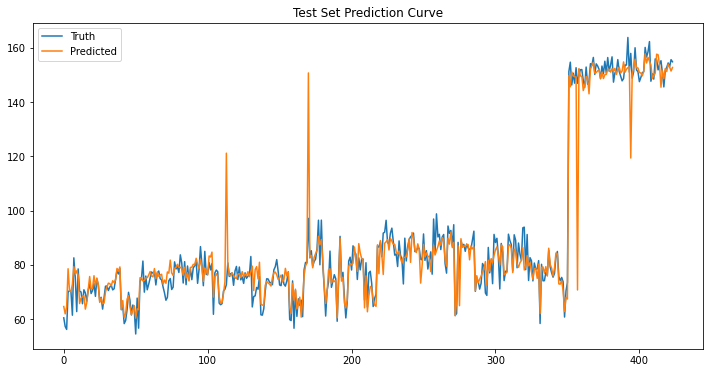

<ipython-input-156-490be4237eaf>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x, train_y)


ExtraTree
mse: 38.5162757824733
mae: 3.580541419811324
error std: 29.822893386257523


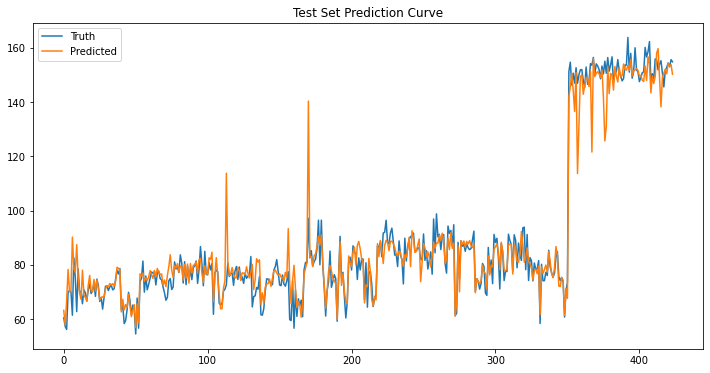

/Users/lihan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost
mse: 59.68896924983252
mae: 5.340176078209624
error std: 30.43759161555982


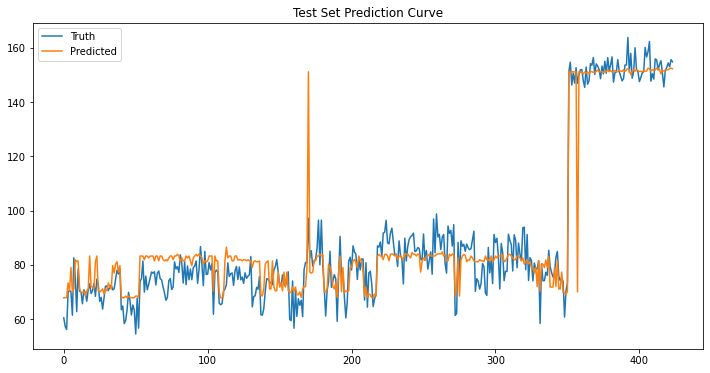

In [156]:
clf_xgb = XGBRegressor()
clf_lgbm = LGBMRegressor()
clf_gbdt = GradientBoostingRegressor()
clf_rf = RandomForestRegressor()
clf_et = ExtraTreesRegressor()
clf_ada = AdaBoostRegressor()
model_list = [clf_xgb, clf_lgbm, clf_gbdt, clf_rf, clf_et, clf_ada]
model_name = ['Xgboost', 'LightGBM', 'GBDT', 'RandomForest', 'ExtraTree', 'AdaBoost']
for i in range(0,len(model_name)):
    model = model_list[i]
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)

    error_mse = mean_squared_error(test_y, y_pred)
    print(f'{model_name[i]}')
    print(f'mse: {error_mse}')
    print(f'mae: {mean_absolute_error(test_y, y_pred)}')
    print(f'error std: {np.std(np.abs(test_y.values - y_pred))}')
          
    plt.figure(figsize=(12,6))
    plt.plot(test_y.values, label='Truth')
    plt.plot(y_pred, label='Predicted')
    plt.title('Test Set Prediction Curve')
    plt.legend()
    plt.show()

## 实验（2）深度学习模型

In [93]:
X_train = np.load("./data phm 2016/X_train_r_three_mode.npy")
y_train = np.load("./data phm 2016/y_train_three_mode.npy")
X_test = np.load("./data phm 2016/X_test_r_three_mode.npy")
y_test = np.load("./data phm 2016/y_test_three_mode.npy")
print('训练集大小: ', X_train.shape, y_train.shape)
print('测试集大小: ', X_test.shape, y_test.shape)

训练集大小:  (1963, 462, 19) (1963, 1)
测试集大小:  (422, 462, 19) (422, 1)


In [94]:
max_batch_length = X_train.shape[1]
variable_number = X_train.shape[2]

### deep learning model

In [108]:
model = Sequential(name='model_conv1d')
model.add(Conv1D(filters=256, kernel_size=2, strides=1, activation='relu', input_shape=(max_batch_length, variable_number),
                        name='conv1d1'))
model.add(MaxPool1D(2, name='maxpool1'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', name='conv1d2'))
model.add(MaxPool1D(2, name='maxpool2'))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', name='conv1d3'))
model.add(MaxPool1D(2, name='maxpool3'))
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', name='conv1d4'))
model.add(MaxPool1D(2, name='maxpool4'))
model.add(Conv1D(filters=16, kernel_size=2, activation='relu', name='conv1d5'))
model.add(MaxPool1D(2, name='maxpool5'))

model.add(Flatten(name='flatten'))

model.add(Dense(16, activation='linear', name='dense1'))
model.add(Dense(1, activation='linear', name='dense2'))
print(model.summary())

# # BiLSTM
# model = Sequential(name='model_biLSTM')
# model.add(Bidirectional(LSTM(units=40, activation='tanh', return_sequences=True), input_shape=(max_batch_length,variable_number), name='biLSTM1'))
# # model.add(Bidirectional(LSTM(units=80, activation='tanh', return_sequences=True), name='biLSTM2'))
# # model.add(Bidirectional(LSTM(units=80, activation='tanh', return_sequences=True), name='biLSTM3'))
# model.add(Bidirectional(LSTM(units=40, activation='tanh', return_sequences=False), name='biLSTM4'))

# # model.add(Dense(16, name='dense1'))
# model.add(Dense(4, name='dense2'))
# model.add(Dense(1, name='dense3'))
# print(model.summary())

Model: "model_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d1 (Conv1D)            (None, 461, 256)          9984      
                                                                 
 maxpool1 (MaxPooling1D)     (None, 230, 256)          0         
                                                                 
 conv1d2 (Conv1D)            (None, 229, 128)          65664     
                                                                 
 maxpool2 (MaxPooling1D)     (None, 114, 128)          0         
                                                                 
 conv1d3 (Conv1D)            (None, 113, 64)           16448     
                                                                 
 maxpool3 (MaxPooling1D)     (None, 56, 64)            0         
                                                                 
 conv1d4 (Conv1D)            (None, 55, 32)           

In [109]:
model.compile(loss='mean_squared_error', optimizer='adadelta', metrics=['mse'])
model.fit(X_train, y_train, epochs=100, batch_size=200)

Epoch 1/100
10/10 [==============================] - 4s 335ms/step - loss: 24595.9883 - mse: 24595.9883
Epoch 2/100
10/10 [==============================] - 3s 335ms/step - loss: 23050.7969 - mse: 23050.7969
Epoch 3/100
10/10 [==============================] - 3s 335ms/step - loss: 21676.4082 - mse: 21676.4082
Epoch 4/100
10/10 [==============================] - 3s 335ms/step - loss: 20441.5020 - mse: 20441.5020
Epoch 5/100
10/10 [==============================] - 3s 337ms/step - loss: 19333.1367 - mse: 19333.1367
Epoch 6/100
10/10 [==============================] - 3s 333ms/step - loss: 18334.1445 - mse: 18334.1445
Epoch 7/100
10/10 [==============================] - 3s 334ms/step - loss: 17421.3730 - mse: 17421.3730
Epoch 8/100
10/10 [==============================] - 3s 336ms/step - loss: 16584.3633 - mse: 16584.3633
Epoch 9/100
10/10 [==============================] - 3s 338ms/step - loss: 15824.7236 - mse: 15824.7236
Epoch 10/100
10/10 [==============================] - 3s 339ms/s

mse: 1927.977651136635
mae: 33.601414326863264
rmse: 43.90874230875481
r2 score: -1.2025250549907764


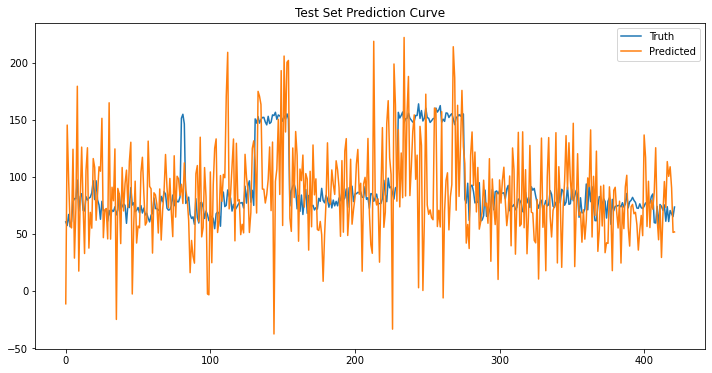

In [110]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'mse: {mse}')
print(f'mae: {mae}')
print(f'rmse: {rmse}')
print(f'r2 score: {r2}')
          
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Truth')
plt.plot(y_pred, label='Predicted')
plt.title('Test Set Prediction Curve')
plt.legend()
plt.show()